# 6. PyTorch를 통한 선형회귀분석

# 1. 선형 회귀분석에 대해

# 1.1 단순 선형회귀분석 기초

- 두가지의 **연속형 변수** 사이의 관계에 대해 이해하게 해 준다.
- 예시
    - x: 독립 변수
        - 무게
    - y: 종속 변수
        - 키
    - y = $\alpha x + \beta$

## 1.2 단순 선형회귀분석의 예

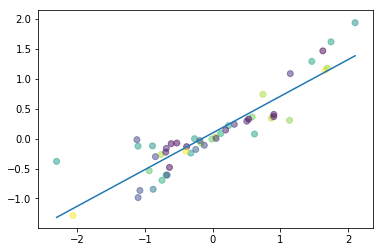

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.rand(n)

colors = np.random.rand(n)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

## 1.3 선형 회귀분석의 목적

- 포인트들과 선의 사이를 최소화($y = \alpha x + \beta$)
- 조정하기
    - 계수: $\alpha$
    - 편향/절편 : $\beta$

# 2. PyTorch를 통해 선형 회귀 모델 구축하기

## 2.1 예

- 계수: $\alpha$ = 2
- 편향/절편: $\beta$ = 1
- 식: $y = 2x + 1$

## 2.2 토이 데이터셋 생성하기

In [72]:
x_values = [i for i in range(11)]

In [73]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [74]:
# numpy로 변환
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [75]:
# 중요: 2차원이 필요하다
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

$y = 2x + 1$

In [76]:
x_train

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]], dtype=float32)

In [77]:
y_values = [2*i + 1 for i in x_values]

In [78]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [79]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

In [80]:
# 중요: 2차원이 필요하다
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

## 2.3 모델 생성하기

### 중요한 선언들

In [57]:
import torch
import torch.nn as nn
from torch.autograd import Variable

### 모델 생성하기

1. 선형 모델
    - True Equation: $y = 2x + 1$
2. 포워드
    - Example
        - Input $x = 1$
        - Output $\hat{y}=?$

In [58]:
# class 생성
class LinearRegressionModel(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__() # nn.Module을 상속받기 위한 것
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        out = self.linear(x)
        return out

#### 모델 클래스 설명하기
- 인풋 : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
- 바라는 아웃풋 : [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [59]:
input_size = 1
output_size = 1

model = LinearRegressionModel(input_size, output_size)

### Loss Class 인스턴스화

- MSE Loss : Mean Squared Error
- $MSE = \frac{1}{2}\sum^{n}_{i=1}(\hat{y_i} - y_i)$
    - $\hat{y}$: prediction
    - $y$: true value

In [60]:
criterion = nn.MSELoss()

### 최적화 Class 인스턴스화

- Simplified equation
    - $\theta = \theta - \eta \cdot \nabla_{\theta}$
        - $\theta$: parameters (our variables)
        - $\eta$: learning rate (how fast we want to learn)
        - $\nabla_{\theta}$: parameters' gradients
        
    - Even simplier equation
        - parameters = parameters - learning_rate * parameters_gradients
            - parameters: $\alpha$ and $\beta$ in $y = \alpha x + \beta$
            - desired parameters: $\alpha = 2$ and $\beta = 1$ in $y = 2x + 1$

In [61]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### 모델 학습시키기
- 1 에폭: x 전체 데이터를 한번 다 도는것
    - 100 에폭:
        - 100x mapping x_train = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
- Process
    1. inputs/labes을 variables로 바꾼다.
    2. gradient buffer 들을 비워준다.
    3. 인풋에 기반한 아웃풋을 내어 준다.
    4. loss를 구한다.
    5. 파라미터에 대한 그라디언트들 구하기
    6. 그라디언트를 이용하여 파라미터 업데이트
        - 파라미터 = 파라미터 - 학습률 * 파라미터 그라디언트
    7. 반복

In [62]:
epochs = 100

In [63]:
for epoch in range(1, epochs+1):
    
    # numpy 배열을 torch 변수로 변환
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # 파라미터들에 대한 Gradients 비우기
    optimizer.zero_grad()
    
    # output을 내기 위한 Forward
    outputs = model(inputs)
    
    # Loss 계산하기
    loss = criterion(outputs, labels)
    
    
    # 파라미터들에 관한 gradients들 얻기
    loss.backward()
    
    
    # 파라미터들 업데이트
    optimizer.step()
    
    print (f'epoch {epoch}, loss {loss.item()}')

epoch 1, loss 179.47335815429688
epoch 2, loss 14.640972137451172
epoch 3, loss 1.1960983276367188
epoch 4, loss 0.09942218661308289
epoch 5, loss 0.009948421269655228
epoch 6, loss 0.0026299962773919106
epoch 7, loss 0.0020127224270254374
epoch 8, loss 0.0019422810291871428
epoch 9, loss 0.0019166857236996293
epoch 10, loss 0.0018949602963402867
epoch 11, loss 0.0018737673526629806
epoch 12, loss 0.001852841000072658
epoch 13, loss 0.0018321448005735874
epoch 14, loss 0.001811694703064859
epoch 15, loss 0.0017914618365466595
epoch 16, loss 0.0017714510904625058
epoch 17, loss 0.0017516856314614415
epoch 18, loss 0.0017320991028100252
epoch 19, loss 0.0017127792816609144
epoch 20, loss 0.001693644793704152
epoch 21, loss 0.0016747366171330214
epoch 22, loss 0.0016560322837904096
epoch 23, loss 0.0016375445993617177
epoch 24, loss 0.0016192689072340727
epoch 25, loss 0.0016011812258511782
epoch 26, loss 0.0015832908684387803
epoch 27, loss 0.0015656145988032222
epoch 28, loss 0.00154811

### 데이터 비교하기

In [64]:
# 위 두 식은 그 기능이 같다.
# model.forward(Variable(torch.from_numpy(x_train))).data.numpy()
# model(Variable(torch.from_numpy(x_train))).data.numpy()

In [65]:
# Purely inference
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ 1.0488532],
       [ 3.041818 ],
       [ 5.0347824],
       [ 7.027747 ],
       [ 9.020712 ],
       [11.013677 ],
       [13.006641 ],
       [14.999606 ],
       [16.99257  ],
       [18.985537 ],
       [20.9785   ]], dtype=float32)

In [66]:
# y = 2x + 1
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

### Plot Graph

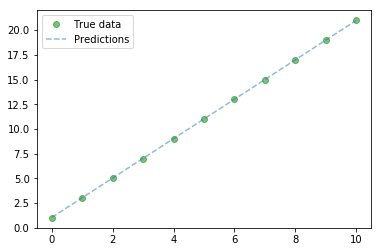

In [67]:
# Clear Figure
plt.clf()

# Get predictions
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

### 모델 저장

In [69]:
save_model = False
if save_model is True:
    # Saves only parameters
    # alpha & beta
    torch.save(model.state_dict(), 'awesome_model.pkl')

### 모델 로드

In [70]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))

# 3. PyTorch (GPU)를 통한 선형회귀 모델 만들기

In [88]:
import torch
import torch.nn as nn
from torch.autograd import Variable

'''
STEP 1: CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):

    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 2: INSTANTIATE MODEL CLASS
'''
input_size = 1
output_size = 1

model = LinearRegressionModel(input_size, output_size)

'''
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5: TRAIN THE MODEL
'''
for epoch in range(1, epochs+1):
    
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    print (f'epoch {epoch}, loss {loss.item()}')

epoch 1, loss 142.19232177734375
epoch 2, loss 11.605179786682129
epoch 3, loss 0.9535170197486877
epoch 4, loss 0.08461693674325943
epoch 5, loss 0.01366720162332058
epoch 6, loss 0.007804561872035265
epoch 7, loss 0.007251621689647436
epoch 8, loss 0.007132682017982006
epoch 9, loss 0.007049898616969585
epoch 10, loss 0.006970921065658331
epoch 11, loss 0.0068930271081626415
epoch 12, loss 0.006816074252128601
epoch 13, loss 0.006739972624927759
epoch 14, loss 0.006664700340479612
epoch 15, loss 0.006590262055397034
epoch 16, loss 0.0065166945569217205
epoch 17, loss 0.006443887483328581
epoch 18, loss 0.006371938157826662
epoch 19, loss 0.0063008214347064495
epoch 20, loss 0.006230439059436321
epoch 21, loss 0.0061608548276126385
epoch 22, loss 0.0060920859687030315
epoch 23, loss 0.0060240537859499454
epoch 24, loss 0.005956783425062895
epoch 25, loss 0.005890266504138708
epoch 26, loss 0.00582447974011302
epoch 27, loss 0.005759454797953367
epoch 28, loss 0.005695142317563295
epoc

GPU: GPU를 켜 둬야 하는 두 가지
- model
- variables

In [90]:
import torch
import torch.nn as nn
from torch.autograd import Variable

'''
STEP 1: CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):

    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 2: INSTANTIATE MODEL CLASS
'''
input_size = 1
output_size = 1

model = LinearRegressionModel(input_size, output_size)

#####################
# USE GPU FOR MODEL #
#####################

if torch.cuda.is_available():
    model.cuda()

'''
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5: TRAIN THE MODEL
'''
for epoch in range(1, epochs+1):
    
    # Convert numpy array to torch Variable
    
    #####################
    # USE GPU FOR MODEL #
    #####################
    
    if torch.cuda.is_available():
        
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    
    else:
    
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    print (f'epoch {epoch}, loss {loss.item()}')

epoch 1, loss 129.62646484375
epoch 2, loss 10.608016967773438
epoch 3, loss 0.8996660709381104
epoch 4, loss 0.10740221291780472
epoch 5, loss 0.042399823665618896
epoch 6, loss 0.03672226518392563
epoch 7, loss 0.03588761389255524
epoch 8, loss 0.03545224294066429
epoch 9, loss 0.03505358844995499
epoch 10, loss 0.03466193377971649
epoch 11, loss 0.034274812787771225
epoch 12, loss 0.03389202430844307
epoch 13, loss 0.03351353481411934
epoch 14, loss 0.03313937410712242
epoch 15, loss 0.032769303768873215
epoch 16, loss 0.03240341693162918
epoch 17, loss 0.03204149380326271
epoch 18, loss 0.03168370947241783
epoch 19, loss 0.03132999315857887
epoch 20, loss 0.03098013997077942
epoch 21, loss 0.03063408099114895
epoch 22, loss 0.030291950330138206
epoch 23, loss 0.029953746125102043
epoch 24, loss 0.029619229957461357
epoch 25, loss 0.02928854711353779
epoch 26, loss 0.02896135300397873
epoch 27, loss 0.02863803692162037
epoch 28, loss 0.028318198397755623
epoch 29, loss 0.02800197713

# 요약

- 단순 **회귀 분석 기초**
    - $y = Ax + B$
    - $y = 2x + 1$
- 단순 회귀 분석의 **예**
- 회귀 분석의 **예**
    - 각 점들과 선의 사이의 거리를 최소화
        - MSE를 통해 "거리" 계산
        - 그라디언트들 계산
        - 파라미터들을 통해 파라미터들 업데이트 = 파라미터들 - 학습률 * 그라디언트들
        - 파라미터 A와 B를 천천히 업데이트한다. y = 2x + 1 형태를 갖는 y와 x 사이의 선형 관계를 모델링 한다
- 선형 회귀분석 모델 생성 **모델**, **CPU와 GPU**의 경우
    - Step 1: 모델 클래스 생성
    - Step 2: 모델 클래스 인스턴스화
    - Step 3: 손실 클래스 인스턴스화
    - Step 4: 최적화 클래스 인스턴스화
    - Step 5: 모델 학습시키기
- **GPU** 옵션에서 켜져 있어야 할 것
    - model
    - variables
- **GPU** 사용법?
    - model_name.cuda()
    - variable_name.cuda()